<a href="https://colab.research.google.com/github/monika-sahay/machine_learning_models/blob/main/Support_vector_regression_model/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression

### importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### importing dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
print(X)
y = y.reshape(len(y),1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [6]:
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [7]:
from sklearn.svm import SVR
object_regressor = SVR(kernel='rbf')
object_regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### predicting new results

In [8]:
sc_y.inverse_transform(object_regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

### visualising the result of svm model

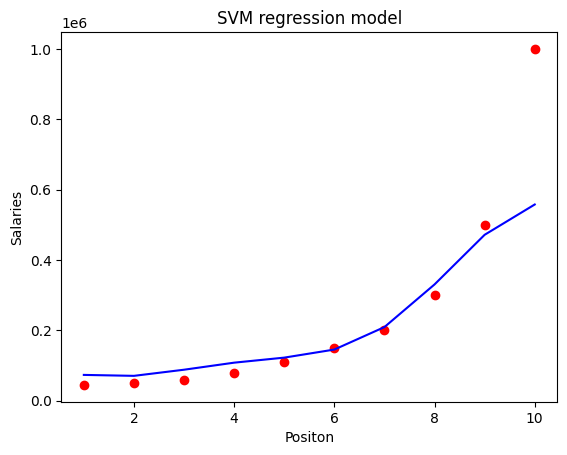

In [13]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color ='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(object_regressor.predict(X).reshape(-1,1)),color='blue' )
plt.title('SVM regression model')
plt.xlabel('Positon')
plt.ylabel('Salaries')
plt.show()

### visualising the result of svm model for higher resolution

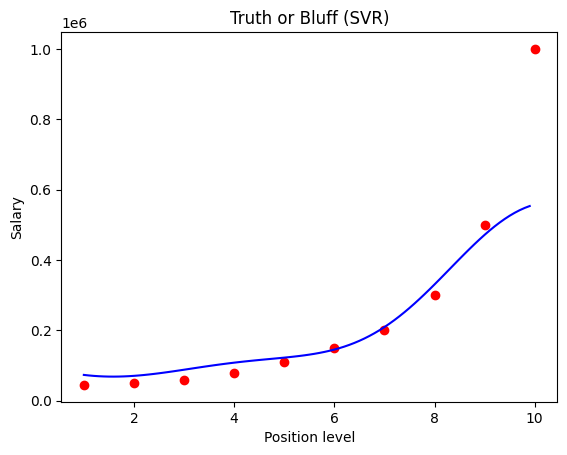

In [19]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(object_regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
